# Testing/Benchmarking Celltypist Models 
### List of Models (made in Making New Models.ipynb)
1. Remove the feature selection from CellTypist (so it only trains the model once)
2. Train the model with L1 regularization instead of L2
3. Train the model only once with only Cytopus genes
4. At the feature selection step, make sure the Cytopus genes are included in the list of top genes

In [3]:
import scanpy as sc
import pandas as pd
import anndata as ad
from anndata import AnnData
import numpy as np

from datetime import datetime
import itertools

from typing import Optional

from sklearn.metrics import f1_score
from sklearn.metrics.cluster import adjusted_rand_score
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy.sparse import spmatrix

#import celltypist as ct
#from celltypist import models

from annotate import annotate

## Get celltype predictions from each model
Run annote_data.py for each dataset first to actually create the datasets with predictions (this notebook assumes that has been done already, this is all just analysis)

### Using CT_45 Models

In [2]:
pred_adata0 = ad.read('/data/peer/adamsj5/cell_typing/Data with Predictions/pred_model0.h5ad')

In [3]:
pred_adata2= ad.read('/data/peer/adamsj5/cell_typing/Data with Predictions/pred_model2.h5ad')

In [4]:
pred_adata3= ad.read('/data/peer/adamsj5/cell_typing/Data with Predictions/pred_model3.h5ad')

In [5]:
pred_adata4= ad.read('/data/peer/adamsj5/cell_typing/Data with Predictions/pred_model4.h5ad')

In [6]:
pred_adata5= ad.read('/data/peer/adamsj5/cell_typing/Data with Predictions/pred_model5.h5ad')

In [7]:
pred_adata6= ad.read('/data/peer/adamsj5/cell_typing/Data with Predictions/pred_model6.h5ad')

### Using CT_98 Models

In [2]:
pred_adata98_0 = ad.read('/data/peer/adamsj5/cell_typing/Data with Predictions/pred_98_model0.h5ad')

In [3]:
pred_adata98_2 = ad.read('/data/peer/adamsj5/cell_typing/Data with Predictions/pred_98_model2.h5ad')

In [4]:
pred_adata98_3 = ad.read('/data/peer/adamsj5/cell_typing/Data with Predictions/pred_98_model3.h5ad')

In [5]:
pred_adata98_4 = ad.read('/data/peer/adamsj5/cell_typing/Data with Predictions/pred_98_model4.h5ad')

In [6]:
pred_adata98_5 = ad.read('/data/peer/adamsj5/cell_typing/Data with Predictions/pred_98_model2.h5ad')

In [11]:
pred_adata98_6= ad.read('/data/peer/adamsj5/cell_typing/Data with Predictions/pred_98_model6.h5ad')

### Using COV_PBMC Models

In [2]:
pred_adataCOV_0 = ad.read('/data/peer/adamsj5/cell_typing/Data with Predictions/pred_COV_model0.h5ad')

In [3]:
pred_adataCOV_2 = ad.read('/data/peer/adamsj5/cell_typing/Data with Predictions/pred_COV_model2.h5ad')

In [4]:
pred_adataCOV_3 = ad.read('/data/peer/adamsj5/cell_typing/Data with Predictions/pred_COV_model3.h5ad')

In [5]:
#making sure the f1 score is the same if we use dataset with all genes vs just cytopus genes 
#predictions_COV_cp_3 = ct.annotate(test_COV_cp, model = 'New Models/COV_PBMC Models/COV_model_3.pkl', majority_voting = True)
#predictions_COV_3.predicted_labels
#pred_adataCOV_cp_3 = predictions_COV_cp_3.to_adata()
#pred_adataCOV_cp_3.write_h5ad('/data/peer/adamsj5/cell_typing/Data with Predictions/pred_COV_cp_model3.h5ad')

In [6]:
pred_adataCOV_4 = ad.read('/data/peer/adamsj5/cell_typing/Data with Predictions/pred_COV_model4.h5ad')

In [7]:
pred_adataCOV_5 = ad.read('/data/peer/adamsj5/cell_typing/Data with Predictions/pred_COV_model5.h5ad')

In [8]:
pred_adataCOV_6 = ad.read('/data/peer/adamsj5/cell_typing/Data with Predictions/pred_COV_model6.h5ad')

### Using Glasner Models

In [4]:
pred_adatag_0 = ad.read('/data/peer/adamsj5/cell_typing/Data with Predictions/pred_g_model0.h5ad')

In [5]:
pred_adatag_2 = ad.read('/data/peer/adamsj5/cell_typing/Data with Predictions/pred_g_model2.h5ad')

In [6]:
pred_adatag_3 = ad.read('/data/peer/adamsj5/cell_typing/Data with Predictions/pred_g_model3.h5ad')

In [7]:
pred_adatag_4 = ad.read('/data/peer/adamsj5/cell_typing/Data with Predictions/pred_g_model4.h5ad')

In [8]:
pred_adatag_5 = ad.read('/data/peer/adamsj5/cell_typing/Data with Predictions/pred_g_model5.h5ad')

In [9]:
pred_adatag_6 = ad.read('/data/peer/adamsj5/cell_typing/Data with Predictions/pred_g_model6.h5ad')

### Using HBCA Models

In [26]:
pred_adataHBCA_0 = ad.read('/data/peer/adamsj5/cell_typing/Data with Predictions/pred_HBCA_model0.h5ad')

In [27]:
pred_adataHBCA_2= ad.read('/data/peer/adamsj5/cell_typing/Data with Predictions/pred_HBCA_model2.h5ad')

In [28]:
pred_adataHBCA_3= ad.read('/data/peer/adamsj5/cell_typing/Data with Predictions/pred_HBCA_model3.h5ad')

In [29]:
pred_adataHBCA_4= ad.read('/data/peer/adamsj5/cell_typing/Data with Predictions/pred_HBCA_model4.h5ad')

In [30]:
pred_adataHBCA_5= ad.read('/data/peer/adamsj5/cell_typing/Data with Predictions/pred_HBCA_model5.h5ad')

In [31]:
pred_adataHBCA_6= ad.read('/data/peer/adamsj5/cell_typing/Data with Predictions/pred_HBCA_model6.h5ad')

### Using LUCA Models

In [13]:
pred_adataLuCA_0 = ad.read('/data/peer/adamsj5/cell_typing/Data with Predictions/pred_LuCA_model0.h5ad')

In [14]:
pred_adataLuCA_2= ad.read('/data/peer/adamsj5/cell_typing/Data with Predictions/pred_LuCA_model2.h5ad')

In [15]:
pred_adataLuCA_3= ad.read('/data/peer/adamsj5/cell_typing/Data with Predictions/pred_LuCA_model3.h5ad')

In [16]:
pred_adataLuCA_4= ad.read('/data/peer/adamsj5/cell_typing/Data with Predictions/pred_LuCA_model4.h5ad')

In [17]:
pred_adataLuCA_5= ad.read('/data/peer/adamsj5/cell_typing/Data with Predictions/pred_LuCA_model5.h5ad')

In [18]:
pred_adataLuCA_6= ad.read('/data/peer/adamsj5/cell_typing/Data with Predictions/pred_LuCA_model6.h5ad')

## Benchmarking
### F1 scores & Adjusted Rand Index
Abdelaal et al. used median F1 scores as their primary statistic

In [10]:
def calc_f1_rand(adata_0, adata_2, adata_3, adata_4, adata_5, adata_6, acc_col, pred_col_ind: str = 'predicted_labels', pred_col_clust: str = 'majority_voting'):
    """
    Calculates both the median F1 score and the Adjusted Rand Index for all of the benchmarking models for one dataset 
    
    adata_0 - AnnData of test data with predictions from Model 0 
    adata_1 - AnnData of test data with predictions from Model 1
    adata_2 - AnnData of test data with predictions from Model 2 
    adata_3 - AnnData of test data with predictions from Model 3 
    adata_4 - AnnData of test data with predictions from Model 4
    acc_col - name of the column that contains groundtruth cell type annotations
    pred_col - name of the column that contains the model predicted annotations
        (Default: 'predicted_labels')
    """
    print("Predicted Labels - Individual")
    #calculate & print F1 scores
    f1_0 =np.median(f1_score(adata_0.obs[acc_col],adata_0.obs[pred_col_ind], average=None))
    print("Model 0 F1: ", f1_0)
    
    f1_2 =np.median(f1_score(adata_2.obs[acc_col],adata_2.obs[pred_col_ind], average=None))
    print("Model 2 F1: ", f1_2)
    
    f1_3 =np.median(f1_score(adata_3.obs[acc_col],adata_3.obs[pred_col_ind], average=None))
    print("Model 3 F1: ", f1_3)
    
    f1_4 =np.median(f1_score(adata_4.obs[acc_col],adata_4.obs[pred_col_ind], average=None))
    print("Model 4 F1: ", f1_4)
    
    f1_5 =np.median(f1_score(adata_5.obs[acc_col],adata_5.obs[pred_col_ind], average=None))
    print("Model 5 F1: ", f1_5)
    
    f1_6 =np.median(f1_score(adata_6.obs[acc_col],adata_6.obs[pred_col_ind], average=None))
    print("Model 6 F1: ", f1_6)
    
    
    print()
    
    #calculate Adjusted Rand Index 
    rand_0 = adjusted_rand_score(adata_0.obs[acc_col], adata_0.obs[pred_col_ind])
    print("Model 0 Adj. Rand Index: ", rand_0)
    
    rand_2 = adjusted_rand_score(adata_2.obs[acc_col], adata_2.obs[pred_col_ind])
    print("Model 2 Adj. Rand Index: ", rand_2)
    
    rand_3 = adjusted_rand_score(adata_3.obs[acc_col], adata_3.obs[pred_col_ind])
    print("Model 3 Adj. Rand Index: ", rand_3)
    
    rand_4 = adjusted_rand_score(adata_4.obs[acc_col], adata_4.obs[pred_col_ind])
    print("Model 4 Adj. Rand Index: ", rand_4)
    
    rand_5 = adjusted_rand_score(adata_5.obs[acc_col], adata_5.obs[pred_col_ind])
    print("Model 5 Adj. Rand Index: ", rand_5)
    
    rand_6 = adjusted_rand_score(adata_6.obs[acc_col], adata_6.obs[pred_col_ind])
    print("Model 6 Adj. Rand Index: ", rand_6)
    
    
    print()
    
    print("Majority Voting Labels - Clusters")
    #calculate & print F1 scores
    f1_0 =np.median(f1_score(adata_0.obs[acc_col],adata_0.obs[pred_col_clust], average=None))
    print("Model 0 F1: ", f1_0)
    
    f1_2 =np.median(f1_score(adata_2.obs[acc_col],adata_2.obs[pred_col_clust], average=None))
    print("Model 2 F1: ", f1_2)
    
    f1_3 =np.median(f1_score(adata_3.obs[acc_col],adata_3.obs[pred_col_clust], average=None))
    print("Model 3 F1: ", f1_3)
    
    f1_4 =np.median(f1_score(adata_4.obs[acc_col],adata_4.obs[pred_col_clust], average=None))
    print("Model 4 F1: ", f1_4)
    
    f1_5 =np.median(f1_score(adata_5.obs[acc_col],adata_5.obs[pred_col_clust], average=None))
    print("Model 5 F1: ", f1_5)
    
    f1_6 =np.median(f1_score(adata_6.obs[acc_col],adata_6.obs[pred_col_clust], average=None))
    print("Model 6 F1: ", f1_6)
    
    print()
    
    #calculate Adjusted Rand Index 
    rand_0 = adjusted_rand_score(adata_0.obs[acc_col], adata_0.obs[pred_col_clust])
    print("Model 0 Adj. Rand Index: ", rand_0)
    
    rand_2 = adjusted_rand_score(adata_2.obs[acc_col], adata_2.obs[pred_col_clust])
    print("Model 2 Adj. Rand Index: ", rand_2)
    
    rand_3 = adjusted_rand_score(adata_3.obs[acc_col], adata_3.obs[pred_col_clust])
    print("Model 3 Adj. Rand Index: ", rand_3)
    
    rand_4 = adjusted_rand_score(adata_4.obs[acc_col], adata_4.obs[pred_col_clust])
    print("Model 4 Adj. Rand Index: ", rand_4)
    
    rand_5 = adjusted_rand_score(adata_5.obs[acc_col], adata_5.obs[pred_col_clust])
    print("Model 5 Adj. Rand Index: ", rand_5)
    
    rand_6 = adjusted_rand_score(adata_6.obs[acc_col], adata_6.obs[pred_col_clust])
    print("Model 6 Adj. Rand Index: ", rand_6)

#### CT_45

In [39]:
calc_f1_rand(pred_adata0, pred_adata2, pred_adata3, pred_adata4, pred_adata5, pred_adata6, acc_col ='Manually_curated_celltype')

Predicted Labels - Individual
Model 0 F1:  0.9077441077441077
Model 2 F1:  0.7784495789246384
Model 3 F1:  0.79175704989154
Model 4 F1:  0.9059449866903282
Model 5 F1:  0.8994469582704877
Model 6 F1:  0.9050964648154343

Model 0 Adj. Rand Index:  0.8622969108463867
Model 2 Adj. Rand Index:  0.7679625037403578
Model 3 Adj. Rand Index:  0.7235133915721292
Model 4 Adj. Rand Index:  0.8589643175314154
Model 5 Adj. Rand Index:  0.8480958247122673
Model 6 Adj. Rand Index:  0.8622510721605288

Majority Voting Labels - Clusters
Model 0 F1:  0.8150572831423895
Model 2 F1:  0.8148946360153256
Model 3 F1:  0.7934284479031561
Model 4 F1:  0.8150572831423895
Model 5 F1:  0.8150572831423895
Model 6 F1:  0.8183115338882284

Model 0 Adj. Rand Index:  0.7270763764215241
Model 2 Adj. Rand Index:  0.7213843053965593
Model 3 Adj. Rand Index:  0.7021438703802911
Model 4 Adj. Rand Index:  0.7246852070823989
Model 5 Adj. Rand Index:  0.7239619061517562
Model 6 Adj. Rand Index:  0.7272984222317669


#### CT_98

In [12]:
calc_f1_rand(pred_adata98_0, pred_adata98_2, pred_adata98_3, pred_adata98_4, pred_adata98_5, pred_adata98_6, acc_col = 'Harmonised_detailed_type')

Predicted Labels - Individual
Model 0 F1:  0.8765100222823416
Model 2 F1:  0.5109795321637427
Model 3 F1:  0.5184706670494783
Model 4 F1:  0.8751234380178845
Model 5 F1:  0.5109795321637427
Model 6 F1:  0.8758656234024901

Model 0 Adj. Rand Index:  0.9025054369575889
Model 2 Adj. Rand Index:  0.8335893539877437
Model 3 Adj. Rand Index:  0.7512077038186908
Model 4 Adj. Rand Index:  0.9071792809172758
Model 5 Adj. Rand Index:  0.8335893539877437
Model 6 Adj. Rand Index:  0.9004760901682533

Majority Voting Labels - Clusters
Model 0 F1:  0.6358623281346166
Model 2 F1:  0.5874687777387857
Model 3 F1:  0.18843982169390788
Model 4 F1:  0.6324175507190843
Model 5 F1:  0.5874687777387857
Model 6 F1:  0.6371245308258089

Model 0 Adj. Rand Index:  0.8028229732851094
Model 2 Adj. Rand Index:  0.7963660782847072
Model 3 Adj. Rand Index:  0.7116964211054766
Model 4 Adj. Rand Index:  0.8073009158376774
Model 5 Adj. Rand Index:  0.7963660782847072
Model 6 Adj. Rand Index:  0.8039039924125327


#### COV_PBMC

In [11]:
calc_f1_rand(pred_adataCOV_0, pred_adataCOV_2, pred_adataCOV_3, pred_adataCOV_4, pred_adataCOV_5, pred_adataCOV_6, acc_col = 'full_clustering')

Predicted Labels - Individual
Model 0 F1:  0.7365831842576029
Model 2 F1:  0.5718670076726343
Model 3 F1:  0.49356340728567516
Model 4 F1:  0.7351885098743267
Model 5 F1:  0.718835304822566
Model 6 F1:  0.7347366216357735

Model 0 Adj. Rand Index:  0.7547177385351914
Model 2 Adj. Rand Index:  0.6899931041558193
Model 3 Adj. Rand Index:  0.5884835121783892
Model 4 Adj. Rand Index:  0.757441793658705
Model 5 Adj. Rand Index:  0.7504542785234777
Model 6 Adj. Rand Index:  0.7591101065720282

Majority Voting Labels - Clusters
Model 0 F1:  0.48337028824833705
Model 2 F1:  0.4587310499719259
Model 3 F1:  0.0
Model 4 F1:  0.5008923259964306
Model 5 F1:  0.5008923259964306
Model 6 F1:  0.5058905058905059

Model 0 Adj. Rand Index:  0.6909537603503824
Model 2 Adj. Rand Index:  0.6822139596710598
Model 3 Adj. Rand Index:  0.6264535984269993
Model 4 Adj. Rand Index:  0.6926703565099702
Model 5 Adj. Rand Index:  0.6918195667423368
Model 6 Adj. Rand Index:  0.6890543583026054


#### Glasner

In [12]:
calc_f1_rand(pred_adatag_0, pred_adatag_2, pred_adatag_3, pred_adatag_4, pred_adatag_5,pred_adatag_6, acc_col = 'finer_cell_types')

Predicted Labels - Individual
Model 0 F1:  0.2539842792240571
Model 2 F1:  0.39576944022471267
Model 3 F1:  0.5966898954703833
Model 4 F1:  0.21479497529141045
Model 5 F1:  0.4522598598982823
Model 6 F1:  0.4850493296230711

Model 0 Adj. Rand Index:  0.9134638805161289
Model 2 Adj. Rand Index:  0.5211194783462373
Model 3 Adj. Rand Index:  0.8997583137853405
Model 4 Adj. Rand Index:  0.9042911114361997
Model 5 Adj. Rand Index:  0.9343761999105369
Model 6 Adj. Rand Index:  0.9002182962982277

Majority Voting Labels - Clusters
Model 0 F1:  0.0
Model 2 F1:  0.6967275494672754
Model 3 F1:  0.3093698074594219
Model 4 F1:  0.0
Model 5 F1:  0.0
Model 6 F1:  0.19138724300456492

Model 0 Adj. Rand Index:  0.941923808430406
Model 2 Adj. Rand Index:  0.8574344866546086
Model 3 Adj. Rand Index:  0.9644789728103291
Model 4 Adj. Rand Index:  0.9301359844952771
Model 5 Adj. Rand Index:  0.9449113662634966
Model 6 Adj. Rand Index:  0.9238612103955628


#### HBCA

In [40]:
calc_f1_rand(pred_adataHBCA_0, pred_adataHBCA_2, pred_adataHBCA_3, pred_adataHBCA_4, pred_adataHBCA_5, pred_adataHBCA_6,acc_col = 'cell_type')

Predicted Labels - Individual
Model 0 F1:  0.909691048323211
Model 2 F1:  0.7935091277890467
Model 3 F1:  0.7721610213116441
Model 4 F1:  0.9042503503035965
Model 5 F1:  0.903368448432826
Model 6 F1:  0.9081800804165843

Model 0 Adj. Rand Index:  0.9715633281037093
Model 2 Adj. Rand Index:  0.9582537009370441
Model 3 Adj. Rand Index:  0.8629622801283677
Model 4 Adj. Rand Index:  0.9720074946185066
Model 5 Adj. Rand Index:  0.9727619822079989
Model 6 Adj. Rand Index:  0.9728513082709941

Majority Voting Labels - Clusters
Model 0 F1:  0.6811250925240562
Model 2 F1:  0.6713554987212277
Model 3 F1:  0.4943330427201395
Model 4 F1:  0.6813170767321312
Model 5 F1:  0.6777677767776777
Model 6 F1:  0.6811250925240562

Model 0 Adj. Rand Index:  0.9514481337980111
Model 2 Adj. Rand Index:  0.9505441713235782
Model 3 Adj. Rand Index:  0.9322648463558564
Model 4 Adj. Rand Index:  0.9534374031943801
Model 5 Adj. Rand Index:  0.9510984293452789
Model 6 Adj. Rand Index:  0.9517770462641694


#### LuCA

In [19]:
calc_f1_rand(pred_adataLuCA_0, pred_adataLuCA_2, pred_adataLuCA_3, pred_adataLuCA_4, pred_adataLuCA_5, pred_adataLuCA_6,acc_col = 'cell_type')

Predicted Labels - Individual
Model 0 F1:  0.9046493301812449
Model 2 F1:  0.8307830783078307
Model 3 F1:  0.7950457092303156
Model 4 F1:  0.8996047430830039
Model 5 F1:  0.8978930307941654
Model 6 F1:  0.9065632072421598

Model 0 Adj. Rand Index:  0.8124926549719007
Model 2 Adj. Rand Index:  0.7527274289097452
Model 3 Adj. Rand Index:  0.6694632458582176
Model 4 Adj. Rand Index:  0.8128571154941004
Model 5 Adj. Rand Index:  0.7976775452109126
Model 6 Adj. Rand Index:  0.8070493400875965

Majority Voting Labels - Clusters
Model 0 F1:  0.8899856055932552
Model 2 F1:  0.8827768192428701
Model 3 F1:  0.8518742442563482
Model 4 F1:  0.89
Model 5 F1:  0.89
Model 6 F1:  0.89

Model 0 Adj. Rand Index:  0.7982441515776821
Model 2 Adj. Rand Index:  0.7917074045767412
Model 3 Adj. Rand Index:  0.7646946351027922
Model 4 Adj. Rand Index:  0.801034203216512
Model 5 Adj. Rand Index:  0.7956782693143293
Model 6 Adj. Rand Index:  0.798169793064862


## Plotting

### UMAP with Conf Score

In [14]:
def make_all_umaps(pred_0, pred_2, pred_3, pred_4, pred_5, pred_6):
    sc.pl.umap(pred_0, color = ['conf_score'])
    print(pred_0.obs['conf_score'].value_counts(bins=4, sort=False))
    
    sc.pl.umap(pred_2, color = ['conf_score'])
    print(pred_2.obs['conf_score'].value_counts(bins=4, sort=False))
    
    sc.pl.umap(pred_3, color = ['conf_score'])
    print(pred_3.obs['conf_score'].value_counts(bins=4, sort=False))
    
    sc.pl.umap(pred_4, color = ['conf_score'])
    print(pred_4.obs['conf_score'].value_counts(bins=4, sort=False))
    
    sc.pl.umap(pred_5, color = ['conf_score'])
    print(pred_6.obs['conf_score'].value_counts(bins=4, sort=False))
    
    sc.pl.umap(pred_6, color = ['conf_score'])
    print(pred_6.obs['conf_score'].value_counts(bins=4, sort=False))

#### CT_45

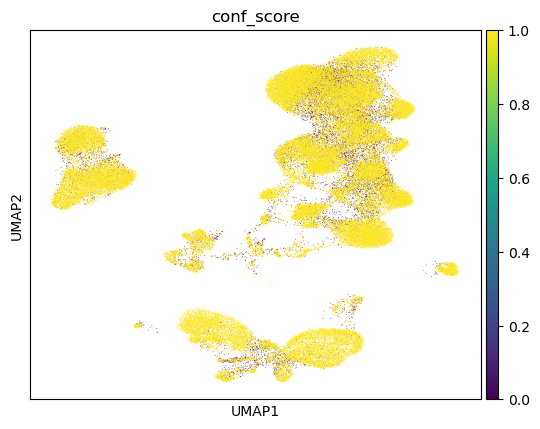

conf_score
(-0.002, 0.25]    13805
(0.25, 0.5]          78
(0.5, 0.75]          84
(0.75, 1.0]       84962
Name: count, dtype: int64


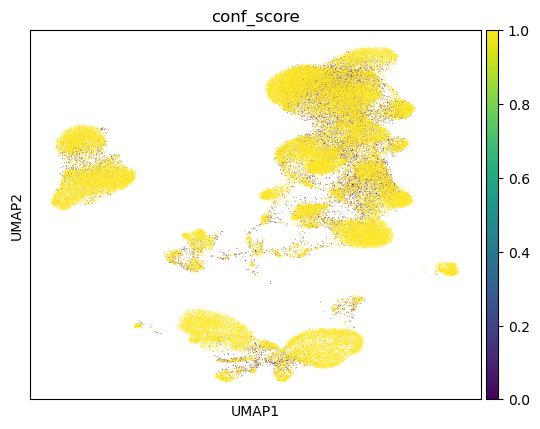

conf_score
(-0.002, 0.25]    12634
(0.25, 0.5]           4
(0.5, 0.75]           3
(0.75, 1.0]       86288
Name: count, dtype: int64


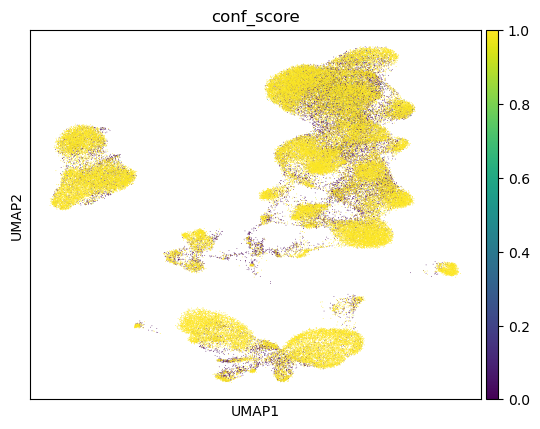

conf_score
(-0.002, 0.25]    22335
(0.25, 0.5]         567
(0.5, 0.75]         578
(0.75, 1.0]       75449
Name: count, dtype: int64


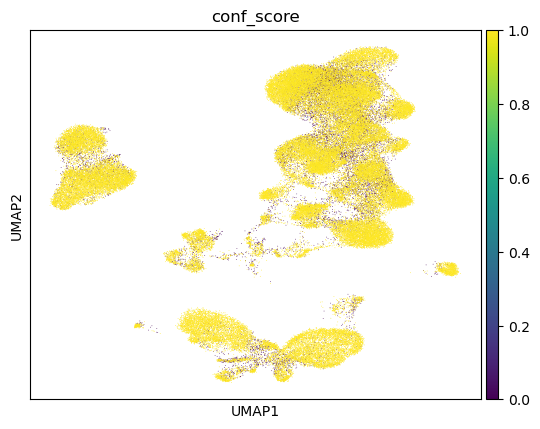

conf_score
(-0.002, 0.25]    13868
(0.25, 0.5]          80
(0.5, 0.75]         115
(0.75, 1.0]       84866
Name: count, dtype: int64


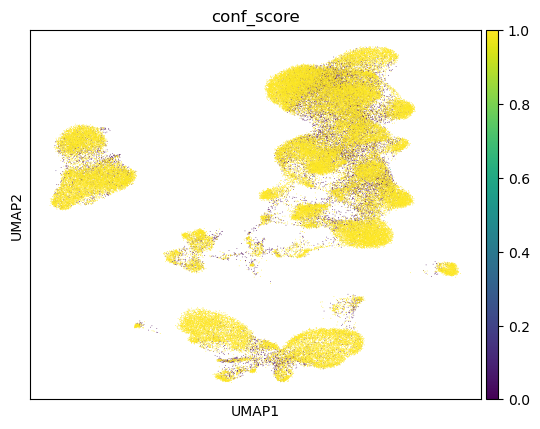

conf_score
(-0.002, 0.25]    14685
(0.25, 0.5]         100
(0.5, 0.75]         100
(0.75, 1.0]       84044
Name: count, dtype: int64


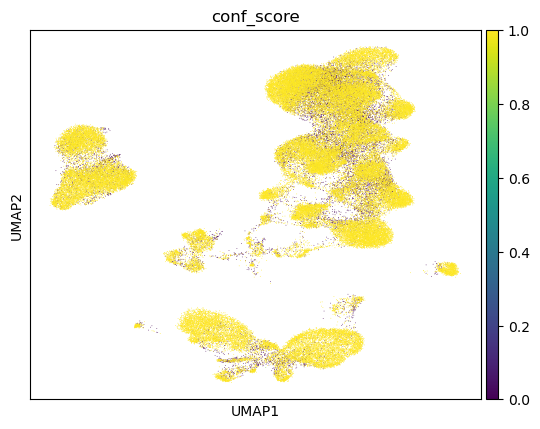

conf_score
(-0.002, 0.25]    14685
(0.25, 0.5]         100
(0.5, 0.75]         100
(0.75, 1.0]       84044
Name: count, dtype: int64


In [27]:
make_all_umaps(pred_adata0, pred_adata2, pred_adata3, pred_adata4, pred_adata5, pred_adata6)

#### Glasner

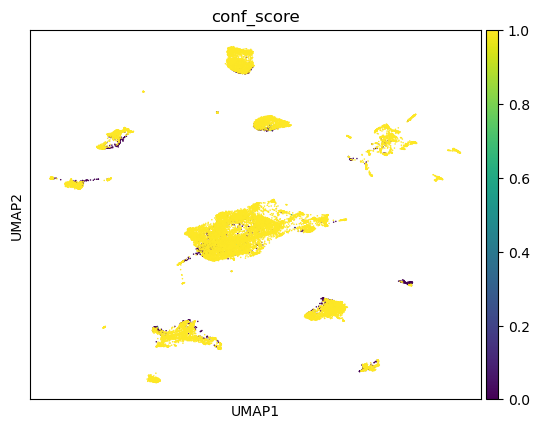

conf_score
(-0.002, 0.25]     2110
(0.25, 0.5]          39
(0.5, 0.75]          39
(0.75, 1.0]       22710
Name: count, dtype: int64


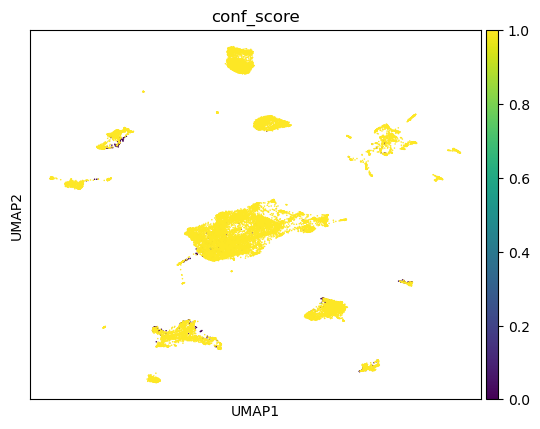

conf_score
(-0.002, 0.25]      542
(0.25, 0.5]           0
(0.5, 0.75]           2
(0.75, 1.0]       24354
Name: count, dtype: int64


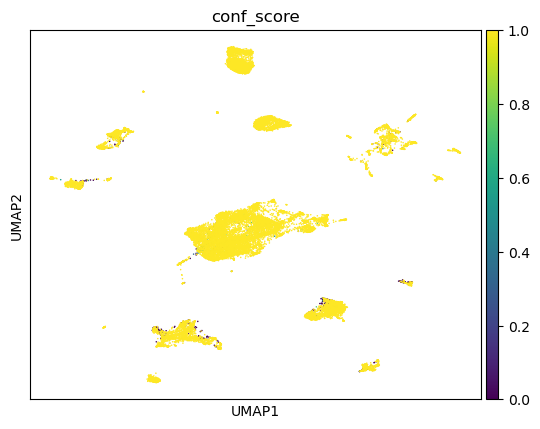

conf_score
(-0.002, 0.25]      626
(0.25, 0.5]          49
(0.5, 0.75]          55
(0.75, 1.0]       24168
Name: count, dtype: int64


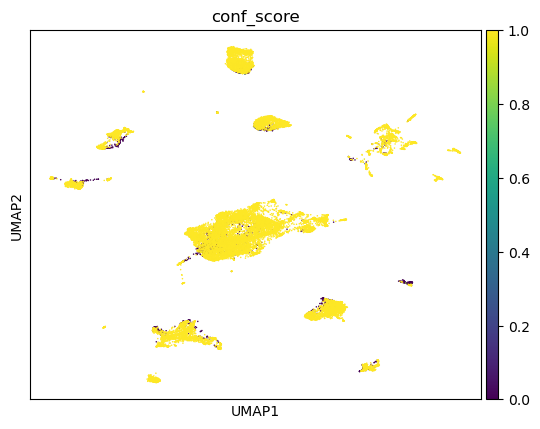

conf_score
(-0.002, 0.25]     2213
(0.25, 0.5]          41
(0.5, 0.75]          39
(0.75, 1.0]       22605
Name: count, dtype: int64


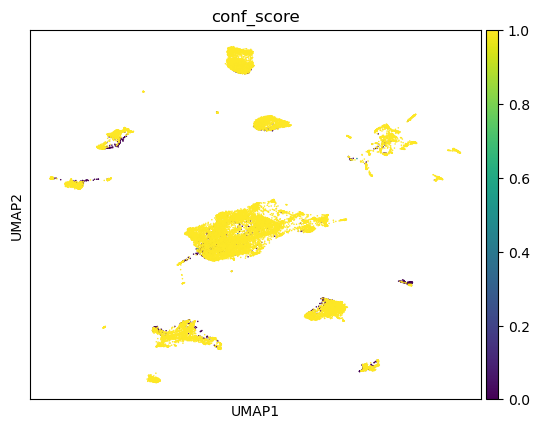

conf_score
(-0.002, 0.25]     1834
(0.25, 0.5]          37
(0.5, 0.75]          25
(0.75, 1.0]       23002
Name: count, dtype: int64


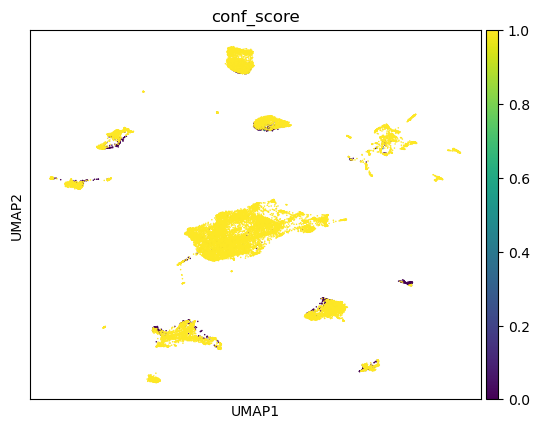

conf_score
(-0.002, 0.25]     1834
(0.25, 0.5]          37
(0.5, 0.75]          25
(0.75, 1.0]       23002
Name: count, dtype: int64


In [15]:
make_all_umaps(pred_adatag_0, pred_adatag_2, pred_adatag_3, pred_adatag_4, pred_adatag_5, pred_adatag_6)

### Stacked barplots

In [ ]:
def make_stacked_barplot(orig, pred, title):
    """
    Function that transforms data into a format needed for a stacked bar plot then makes said plot
    
    orig - list 
        - obs column that has the original (truth) cell type annotations
        eg: pred_adatag_0.obs["finer_cell_types"]}
    pred - list
        - obs column that has the predicted cell type annotations
        eg: predictions_g_0.predicted_labels["predicted_labels"].cat.categories
    title - title for the plot 
    """
    celltypes = celltypes ={"original":orig, "predicted": pred}
    df_lists = pd.DataFrame(data = celltypes)
    counts_df = pd.DataFrame(data = {"original":orig.cat.categories})
    for x in pred.cat.categories: 
        #print(x)
        df = df_lists.loc[df_lists['original'] == x]
        labels = []
        counts = []
        for y in orig.cat.categories:
            labels.append(y)
            if y in pred.cat.categories:
                count = df['predicted'].value_counts()[y]
                #print(count)
                counts.append(count)
            else: 
                counts.append(0)
        #print(counts)
        df_1orig = pd.DataFrame(data = {"original": labels, x: counts})
        #print(df_1orig)
        counts_df = pd.merge(counts_df, df_1orig, on ='original')
    counts_df
    counts_df.plot.bar(x = 'original', title = title, stacked=True, figsize = (14,9), colormap = 'gist_ncar')
    plt.legend(loc=(1.04, 0))

#### CT_45

In [ ]:
make_stacked_barplot(orig= pred_adatact.obs["Manually_curated_celltype"], pred = pred_adatact.obs["predicted_labels"], title = "CT_45 0 - 0.884" )

In [ ]:
make_stacked_barplot(orig= pred_adata2.obs["Manually_curated_celltype"], pred = pred_adata2.obs["predicted_labels"], title = "CT_45 2 - 0.762" )

In [ ]:
make_stacked_barplot(orig= pred_adata3.obs["Manually_curated_celltype"], pred = pred_adata3.obs["predicted_labels"], title = "CT_45 3 - 0.791" )

In [ ]:
make_stacked_barplot(orig= pred_adata4.obs["Manually_curated_celltype"], pred = pred_adata4.obs["predicted_labels"], title = "CT_45 4 - 0.887" )

In [ ]:
make_stacked_barplot(orig= pred_adata5.obs["Manually_curated_celltype"], pred = pred_adata5.obs["predicted_labels"], title = "CT_45 5 - 0.874" )

#### CT_98

In [ ]:
make_stacked_barplot(orig= pred_adata98_0.obs["Harmonised_detailed_type"], pred = pred_adata98_0.obs["predicted_labels"], title = "CT_98 0" )

In [ ]:
make_stacked_barplot(orig= pred_adata98_2.obs["Harmonised_detailed_type"], pred = pred_adata98_2.obs["predicted_labels"], title = "CT_98 2" )

In [ ]:
make_stacked_barplot(orig= pred_adata98_3.obs["Harmonised_detailed_type"], pred = pred_adata98_3.obs["predicted_labels"], title = "CT_98 3" )

In [ ]:
make_stacked_barplot(orig= pred_adata98_4.obs["Harmonised_detailed_type"], pred = pred_adata98_4.obs["predicted_labels"], title = "CT_98 4" )

In [ ]:
make_stacked_barplot(orig= pred_adata98_5.obs["Harmonised_detailed_type"], pred = pred_adata98_5.obs["predicted_labels"], title = "CT_98 5" )

#### Glasner Data

In [ ]:
make_stacked_barplot(orig= pred_adatag_0.obs["finer_cell_types"], pred = pred_adatag_0.obs["predicted_labels"], title = "Glasner Model 0 - 0.254" )

In [ ]:
make_stacked_barplot(orig= pred_adatag_2.obs["finer_cell_types"], pred = pred_adatag_2.obs["predicted_labels"], title = "Glasner Model 2 - 0.396" )

In [ ]:
make_stacked_barplot(orig= pred_adatag_3.obs["finer_cell_types"], pred = pred_adatag_3.obs["predicted_labels"], title = "Glasner Model 3 - 0.597" )

In [ ]:
make_stacked_barplot(orig= pred_adatag_4.obs["finer_cell_types"], pred = pred_adatag_4.obs["predicted_labels"], title = "Glasner Model 4 - 0.215" )

### Nested Sankey

In [ ]:
def assign_nums(df, base_num, col, idx, new_col, index_dict: Optional[dict]  = None, make_dict: bool = True):
    """
    Assigns unique (sequential) numbers/codes to each unique category in a colum 
    
    df - the dataframe (of an AnnData object's obs) 
    base_num - the number to start assigning codes at - 1
    col - which column of the df to find the categories (eg cell type annotations)
    idx - ? 
    new col - a column to make in the df that will hold the same info as col but translated into the new codes
    index_dict - An existing dictionary of categories to codes 
        (Optional, Type = Dict)
    make_dict - whether or not to make dict (or use on if passed in)
        (Default: True)
    """
    index_list = []
    index = int(base_num)
    if make_dict:
        for x in np.unique(df[col]):
            index_list.append([x,index])
            index = int(index + 1)
        index_dict = dict(index_list)
        #print(index_dict)
    df[new_col] = np.nan
    for i, row in df.iterrows(): 
        #if idx == 1: 
        #    cell_type = df.at[i,col]
        #elif idx == 2: 
        #    cell_type = df.at[i,col]
        cell_type = df.at[i,col]
        df.at[i,new_col] = int(index_dict[cell_type])
    if make_dict: 
        return index_dict

In [ ]:
def make_sankey_data(adata, pred_col, acc_col, fxn, num_coarse, num_fine):
    """
    Takes AnnData with predicted labels and turn it into the format a Sankey plot needs. 
    Returns 4 lists: source, target, count, labels 
    
    adata - AnnData with predicted cell type lables
    pred_col - name of obs column that holds predicted annotations 
    acc_col - name of obs column that holds orginal (truth) cell type annotations that model was trained with 
    fxn - what function for df.apply to use when making cell type annotations more coarse
    num_coarse - the number of cell types in the coarse annotation list made by df.apply 
    num_fine - the number of cell types in the original annotation list 
    """
    df = adata.obs
    df['acc_coarse'] = df.apply(lambda row: fxn(row, col_name = acc_col), axis=1)
    df = df[[ 'acc_coarse', acc_col , pred_col]]
    
    acc = pd.DataFrame(df.groupby(['acc_coarse', acc_col], as_index=False).size())
    pred = pd.DataFrame(df.groupby([acc_col, pred_col],as_index=False).size())
    
    coarse_dict = assign_nums(acc, 0, 'acc_coarse', 1, 'acc_coarse_nums')
    finer_dict = assign_nums(acc, num_coarse+1, acc_col, 2, 'acc_finer_nums')
    assign_nums(pred, (num_coarse+1), acc_col, 1, 'acc_finer_nums', finer_dict, make_dict = False)
    pred_dict = assign_nums(pred, (num_coarse + num_fine + 1), pred_col, 2, 'pred_finer_nums')
    
    source = acc['acc_coarse_nums'].tolist()
    source.extend(pred['acc_finer_nums'].tolist())
    target = acc['acc_finer_nums'].tolist()
    target.extend(pred['pred_finer_nums'].tolist())
    count = acc['size'].tolist()
    count.extend(pred['size'].tolist())
     
    coarse_dict_keys = list(coarse_dict.keys())
    finer_dict_keys = list(finer_dict.keys())
    pred_dict_keys = list(pred_dict.keys())
    labels = coarse_dict_keys + finer_dict_keys + pred_dict_keys
    
    return source, target, count, labels

In [ ]:
def make_sankey(source, target, count, labels, width: int = 700, height: int = 500, title: str = 'Sankey Plot'):
    """
    Makes the Nested Sankey plot by plotting using the plotly Sankey function.
    Returns the plotly Sankey Plot
    
    source - list of source nodes for the sankey plot
    target - list of target nodes that correspond to the source nodes of the sankey plot
    count - list of the amount of flow for a particular source to target 
    labels - the list of coarse, then original, then predicted cell types to map source and target lists to so the plot has labels
    width - width of the sankey plot 
        (Default: 700)
    height - height of the sankey plot 
        (Default: 500)
    title - title for the plot
        (Default: 'Sankey Plot')
    """
    
    fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = labels
    ),
    link = dict(
      source = source, 
      target = target,
      value = count
      ))])

    fig.update_layout(
        autosize=False,
        width=width,
        height=height, 
        title = title)
    return fig

In [ ]:
def one_type_sankey(adata, pred_col, acc_col, fxn, show_coarse: bool = True):
    """
    Takes AnnData with predicted labels, focus on just cell type or coarse cell type group, turn it into the format a Sankey plot needs, then turn plot using make_sankey
    
    adata - AnnData with predicted cell type lables
    pred_col - name of obs column that holds predicted annotations 
    acc_col - name of obs column that holds orginal (truth) cell type annotations that model was trained with 
    fxn - what function for df.apply to use when making cell type annotations more coarse
    show_coarse - whether to plot each coarse cell type (True) or the more granular cell type (False) 
        (Default: True)
    """
    df = adata.obs
    df['acc_coarse'] = df.apply(lambda row: fxn(row, col_name = acc_col), axis=1)
    df = df[[ 'acc_coarse', acc_col , pred_col]]
    
    if show_coarse:
        for x in np.unique(df['acc_coarse']):
            df_one_type = df.loc[df['acc_coarse'] == x]
            acc = pd.DataFrame(df_one_type.groupby(['acc_coarse', acc_col], as_index=False).size())
            pred = pd.DataFrame(df_one_type.groupby([acc_col, pred_col],as_index=False).size())


            both = pd.merge(acc, pred, on = acc_col)
            """
            coarse_dict = assign_nums(both, 0, 'acc_coarse', 1, 'acc_coarse_nums')
            finer_dict = assign_nums(both, 1, acc_col, 2, 'acc_finer_nums')
            pred_dict = assign_nums(both, (len(np.unique(both['acc_finer_nums'])) + 1), pred_col, 2, 'pred_finer_nums')

            source = both['acc_coarse_nums'].tolist()
            source.extend(both['acc_finer_nums'].tolist())
            target = both['acc_finer_nums'].tolist()
            target.extend(both['pred_finer_nums'].tolist())
            count = both['size_x'].tolist()
            count.extend(both['size_y'].tolist())
            """
            acc = pd.DataFrame(df.groupby(['acc_coarse', acc_col], as_index=False).size())
            pred = pd.DataFrame(df.groupby([acc_col, pred_col],as_index=False).size())

            coarse_dict = assign_nums(acc, 0, 'acc_coarse', 1, 'acc_coarse_nums')
            finer_dict = assign_nums(acc,  1, acc_col, 2, 'acc_finer_nums')
            assign_nums(pred, 1, acc_col, 1, 'acc_finer_nums', finer_dict, make_dict = False)
            pred_dict = assign_nums(pred, (len(np.unique(pred[pred_col])) + 2), pred_col, 2, 'pred_finer_nums')

            coarse_dict_keys = list(coarse_dict.keys())
            finer_dict_keys = list(finer_dict.keys())
            pred_dict_keys = list(pred_dict.keys())
            labels = coarse_dict_keys + finer_dict_keys + pred_dict_keys
            
            source = acc['acc_coarse_nums'].tolist()
            source.extend(pred['acc_finer_nums'].tolist())
            target = acc['acc_finer_nums'].tolist()
            target.extend(pred['pred_finer_nums'].tolist())
            count = acc['size'].tolist()
            count.extend(pred['size'].tolist())
            
            fig = make_sankey(source, target, count, labels,1000, 700, x)
            fig.show()
      
    else:  
        for x in np.unique(df[acc_col]):
            df_one_type = df.loc[df[acc_col] == x]
            acc = pd.DataFrame(df_one_type.groupby(['acc_coarse', acc_col], as_index=False).size())
            pred = pd.DataFrame(df_one_type.groupby([acc_col, pred_col],as_index=False).size())


            both = pd.merge(acc, pred, on = acc_col)

            finer_dict = assign_nums(both, 0, acc_col, 2, 'acc_finer_nums')
            pred_dict = assign_nums(both, 1, pred_col, 2, 'pred_finer_nums')

            source = both_select['acc_finer_nums'].tolist()
            target = both_select['pred_finer_nums'].tolist()
            count = both_select['size_y'].tolist()

            finer_dict_keys = list(finer_dict.keys())
            pred_dict_keys = list(pred_dict.keys())
            labels =  finer_dict_keys + pred_dict_keys


            fig = make_sankey(source, target, count, labels,1000, 700, x)
            fig.show()
    
    

#### CT_45

In [ ]:
def categorise_45(row, col_name): 
    """
    Function to categories the 45 cell types from CT_45 into more coarse groups (informed by cytopus)
    
    row - which row we are currently assessing
    col_name - the column that holds the cell type annotations
    """
    if row[col_name] == 'ABCs' or row[col_name] == 'GC_B (I)' or row[col_name] == 'GC_B (II)' or row[col_name] == 'Memory B cells' or row[col_name] == 'Naive B cells' or row[col_name] =='Plasma cells' or row[col_name] == 'Plasmablasts':
        return 'B cell' 
    elif row[col_name] == 'Alveolar macrophages' or row[col_name] == 'Classical monocytes' or row[col_name] == 'DC1' or row[col_name] == 'DC2' or row[col_name] == 'Erythrophagocytic macrophages' or row[col_name] == 'Intermediate macrophages'  or row[col_name] == 'Intestinal macrophages' or row[col_name] == 'Mast cells' or row[col_name] == 'Nonclassical monocytes' or row[col_name] == 'migDC' or row[col_name] == 'pDC':
        return 'Myeloid'
    elif row[col_name] == 'T_CD4/CD8' or row[col_name] == 'Tem/emra_CD8' or row[col_name] == 'Tnaive/CM_CD4' or row[col_name] == 'Tnaive/CM_CD4_activated' or row[col_name] == 'Tnaive/CM_CD8' or row[col_name] == 'Trm/em_CD8' or row[col_name] == 'Trm_Tgd' or row[col_name] == 'Trm_Th1/Th17' or row[col_name] == 'Trm_Th1/Th17' or row[col_name] == 'Tregs' or row[col_name] == 'Teffector/EM_CD4' or row[col_name] == 'Tfh' or row[col_name] == 'Tgd_CRTAM+' or row[col_name] == 'MAIT' or row[col_name] == 'Trm_gut_CD8':   
        return 'T cell'
    return row[col_name]

##### Model 0

###### One Cell Type at a Time

###### All Cell Types

In [ ]:
source_45_0, target_45_0, count_45_0, labels_45_0  = make_sankey_data(pred_adatact, 'predicted_labels', 'Manually_curated_celltype', categorise_45, 16, 45 )

In [ ]:
fig_45_0 = make_sankey(source_45_0, target_45_0, count_45_0, labels_45_0, 1200, 900, "CT_45 Model 0 Sankey Plot (F1 - 0.885)")
fig_45_0.show()

##### Model 2

###### All Cell Types

In [ ]:
source_45_2, target_45_2, count_45_2, labels_45_2 = make_sankey_data(pred_adata2, 'predicted_labels', 'Manually_curated_celltype', categorise_45, 16, 45 )

In [ ]:
fig_45_2 = make_sankey(source_45_2, target_45_2, count_45_2, labels_45_2, 1200, 900, "CT_45 Model 2 Sankey Plot (F1 - 0.762)")
fig_45_2.show()

##### Model 3

###### All Cell Types

In [ ]:
source_45_3, target_45_3, count_45_3, labels_45_3 = make_sankey_data(pred_adata3, 'predicted_labels', 'Manually_curated_celltype', categorise_45, 16, 45)

In [ ]:
fig_45_3 = make_sankey(source_45_3, target_45_3, count_45_3, labels_45_3, 1500, 900, "CT_45 Model 3 Sankey Plot (F1 - 0.791)")
fig_45_3.show()

##### Model 4

###### All Cell Types

In [ ]:
source_45_4, target_45_4, count_45_4, labels_45_4 = make_sankey_data(pred_adata4, 'predicted_labels', 'Manually_curated_celltype', categorise_45, 16, 45)

In [ ]:
fig_45_4 = make_sankey(source_45_4, target_45_4, count_45_4,labels_45_4, 1200, 900, "CT_45 Model 4 Sankey Plot (F1 - 0.887)")
fig_45_4.show()

##### Model 5

###### All Cell Types

In [ ]:
source_45_5, target_45_5, count_45_5, labels_45_5 = make_sankey_data(pred_adata5, 'predicted_labels', 'Manually_curated_celltype', categorise_45, 16, 45)

In [ ]:
fig_45_5 = make_sankey(source_45_5, target_45_5, count_45_5, labels_45_5, 1500, 900, "CT_45 Model 0 Sankey Plot (F1 - 0.874)")
fig_45_5.show()

#### CT_98

In [ ]:
def categorise_98(row, col_name): 
    """
    Function to categories the 98 cell types from CT_98 into more coarse groups (informed by cytopus)
    Returns the new coarse label
    
    row - which row we are currently assessing
    col_name - the column that holds the cell type annotations
    """
    if row[col_name] == 'Age-associated B cells' or row[col_name] == 'B cells' or row[col_name] == 'Cycling B cells' or row[col_name] == 'Memory B cells' or row[col_name] == 'Plasma cells' or row[col_name] == 'Plasmablasts' or row[col_name] == 'Pre-pro-B cells' or row[col_name] == 'Pro-B cells' or row[col_name] =='Proliferative germinal center B cells' or row[col_name] == 'Follicular B cells' or row[col_name] == 'Germinal center B cells' or row[col_name] == 'Naive B cells' or row[col_name] == 'Transitional B cells' or row[col_name] ==  'Large pre-B cells' or row[col_name] ==  'Small pre-B cells':
        return 'B cell' 
    elif row[col_name] == 'Alveolar macrophages' or row[col_name] == 'Classical monocytes' or row[col_name] == 'DC'or row[col_name] == 'DC1' or row[col_name] == 'DC2' or row[col_name] == 'DC3' or row[col_name] == 'DC precursor' or row[col_name] == 'Erythrophagocytic macrophages' or row[col_name] == 'Intermediate macrophages' or row[col_name] == 'Intestinal macrophages' or row[col_name] == 'Macrophages' or row[col_name] == 'Mast cells' or row[col_name] == 'Nonclassical monocytes' or row[col_name] =='Migratory DCs'or row[col_name] == 'Mono-mac' or row[col_name] == 'Monocyte precursor' or row[col_name] == 'Monocytes' or row[col_name] == 'Myelocytes'or row[col_name] == 'Neutrophil-myeloid progenitor'or row[col_name] == 'Neutrophils' or row[col_name] == 'pDC' or row[col_name] == 'pDC precursor' or row[col_name] == 'CMP' or row[col_name] == 'Hofbauer cells' or row[col_name] == 'Cycling monocytes' or row[col_name] == 'Non-classical monocytes' or row[col_name] == 'Transitional DC' or row[col_name] == 'Kidney-resident macrophages' or row[col_name] =='Early erythroid' or row[col_name] ==  'Erythrocytes'or row[col_name] == 'Late erythroid'or row[col_name] == 'Mid erythroid':
        return 'Myeloid'
    elif row[col_name] == 'CD8a/a' or row[col_name] == 'CD8a/b(entry)' or row[col_name] == 'CRTAM+ gamma-delta T cells' or row[col_name] == 'Follicular helper T cells' or row[col_name] == 'MAIT cells' or row[col_name] == 'Memory CD4+ cytotoxic T cells' or row[col_name] == 'Regulatory T cells' or row[col_name] == 'T(agonist)' or row[col_name] == 'Tcm/Naive cytotoxic T cells' or row[col_name] == 'Tcm/Naive helper T cells' or row[col_name] == 'Tem/Effector helper T cells' or row[col_name] == 'Tem/Effector helper T cells PD1+' or row[col_name] == 'Tem/Temra cytotoxic T cells' or row[col_name] == 'Tem/Trm cytotoxic T cells' or row[col_name] == 'Treg(diff)' or row[col_name] == 'Trm cytotoxic T cells' or row[col_name] == 'Type 1 helper T cells' or row[col_name] == 'Type 17 helper T cells' or row[col_name] == 'gamma-delta T cells'or row[col_name] == 'Cycling T cells' or row[col_name] =='Cycling gamma-delta T cells':   
        return 'T cell'
    elif row[col_name] == 'CD16+ NK cells' or row[col_name] == 'Cycling NK cells' or row[col_name] == 'ILC' or row[col_name] == 'ILC1' or row[col_name] == 'ILC2' or row[col_name] == 'ILC3' or row[col_name] == 'ILC precursor' or row[col_name] == 'NK cells' or row[col_name] == 'NKT cells' or row[col_name] == 'Transitional NK':
        return 'TNK'
    return row[col_name]

In [ ]:
la = pred_adata98_0.obs.apply(lambda row: categorise_98(row, col_name = "Harmonised_detailed_type"), axis=1)

In [ ]:
np.unique(la)

##### Model 0

###### One Cell Type at a Time

In [ ]:
one_type_sankey(pred_adata98_0, 'predicted_labels', 'Harmonised_detailed_type', categorise_98)

##### Model 2

###### One Cell Type at a Time

In [ ]:
one_type_sankey(pred_adata98_2, 'predicted_labels', 'Harmonised_detailed_type', categorise_98)

##### Model 3

###### One Cell Type at a Time

In [ ]:
one_type_sankey(pred_adata98_3, 'predicted_labels', 'Harmonised_detailed_type', categorise_98)

##### Model 4

###### One Cell Type at a Time

In [ ]:
one_type_sankey(pred_adata98_4, 'predicted_labels', 'Harmonised_detailed_type', categorise_98)

##### Model 5

###### One Cell Type at a Time

In [ ]:
one_type_sankey(pred_adata98_5, 'predicted_labels', 'Harmonised_detailed_type', categorise_98)

#### Glanser

In [ ]:
def categorise_glanser(row, col_name):  
    """
    Function to categories the 45 cell types from CT_45 into more coarse groups (informed by cytopus)
    Returns the new coarse label
    
    row - which row we are currently assessing
    col_name - the column that holds the cell type annotations
    """
    if row[col_name] == 'adventitial_fibroblast' or row[col_name] == 'alveolar_lung_fibroblast' or row[col_name] == 'LRRC15_myofibroblast':
        return 'Fibroblast'
    elif row[col_name] == 'Myeloid' or row[col_name] == 'DC_Langerhans' or row[col_name] == 'DC_Mature' or row[col_name] == 'Macrophage' or row[col_name] == 'Macrophage_Alveolar'or row[col_name] == 'Mast'  or row[col_name] == 'Neutrophil' or row[col_name] == 'cDC1' or row[col_name] == 'cDC2'  or row[col_name] == 'cMonocyte' or row[col_name] == 'cycling_macrophage' or row[col_name] == 'ncMonocyte' or row[col_name] == 'neutrophil':
        return 'Myeloid'
    return row[col_name]

##### Model 0

###### One Cell Type at a Time

In [ ]:
one_type_sankey(pred_adatag_0, 'predicted_labels', 'finer_cell_types', categorise_glanser)

###### All Cell Types

In [ ]:
source_g_0, target_g_0, count_g_0,labels_g_0= make_sankey_data(pred_adatag_0, 'predicted_labels', 'finer_cell_types', categorise_glanser,7, 22)  

In [ ]:
fig_g_0 = make_sankey(source_g_0, target_g_0, count_g_0, labels_g_0, 1500, 900, "Glanser Model 0 Sankey Plot (F1 - 0.254)")
fig_g_0.show()

##### Model 2

###### One Cell Type at a Time

In [ ]:
one_type_sankey(pred_adatag_2, 'predicted_labels', 'finer_cell_types', categorise_glanser)

###### All Cell Types

In [ ]:
source_g_2, target_g_2, count_g_2,labels_g_2= make_sankey_data(pred_adatag_2, 'predicted_labels', 'finer_cell_types', categorise_glanser,7, 22) 

In [ ]:
fig_g_2 = make_sankey(source_g_2, target_g_2, count_g_2, labels_g_2, 1500, 900, "Glanser Model 2 Sankey Plot (F1 - 0.396)")
fig_g_2.show()

##### Model 3

###### One Cell Type at a Time

In [ ]:
one_type_sankey(pred_adatag_3, 'predicted_labels', 'finer_cell_types', categorise_glanser)

###### All Cell Types

In [ ]:
source_g_3, target_g_3, count_g_3,labels_g_3 = make_sankey_data(pred_adatag_3, 'predicted_labels', 'finer_cell_types', categorise_glanser,7, 22) 

In [ ]:
fig_g_3 = make_sankey(source_g_3, target_g_3, count_g_3,labels_g_3, 1500, 900, "Glanser Model 3 Sankey Plot (F1 - 0.597)")
fig_g_3.show()

##### Model 4

###### One Cell Type at a Time

In [ ]:
one_type_sankey(pred_adatag_4, 'predicted_labels', 'finer_cell_types', categorise_glanser)

###### All Cell Types

In [ ]:
source_g_4, target_g_4, count_g_4,labels_g_4 = make_sankey_data(pred_adatag_4, 'predicted_labels', 'finer_cell_types', categorise_glanser,7, 22) 

In [ ]:
fig_g_4 = make_sankey(source_g_4, target_g_4, count_g_4,labels_g_4,1500, 900, "Glanser Model 4 Sankey Plot (F1 - 0.215)")
fig_g_4.show()

##### Model 5

###### One Cell Type at a Time

In [ ]:
one_type_sankey(pred_adatag_5, 'predicted_labels', 'finer_cell_types', categorise_glanser)

###### All Cell Types

In [ ]:
source_g_5, target_g_5, count_g_5, labels_g_5 = make_sankey_data(pred_adatag_5, 'predicted_labels', 'finer_cell_types', categorise_glanser,7, 22)


In [ ]:
fig_g_5 = make_sankey(source_g_5, target_g_5, count_g_5,labels_g_5, 1500, 900, "Glanser Model 5 Sankey Plot (F1 - 0.452)")
fig_g_5.show()